
# "Epigenetic Clocks" in GEO Data

This example loads a DNA Methylation data from GEO, calculates multiple epigenetic clocks, and plots them against chronological age. 


## First load up some methylation data from GEO using the data library



In [1]:
# Install required packages
%pip install --upgrade pip
%pip install biolearn seaborn pandas

In [6]:
# Import required libraries
import seaborn as sn
import pandas as pd
from biolearn.data_library import DataLibrary
from biolearn.model_gallery import ModelGallery
import matplotlib.pyplot as plt

In [2]:
#Load up GSE41169 blood DNAm data
data_source = DataLibrary().get("GSE41169")
data = data_source.load()

#The data has the methylation data as well as metadata for each subject
methylation_data = data.dnam

## Now run three different clocks on the dataset to produce epigenetic clock ages



In [3]:
gallery = ModelGallery()
#Note that by default clocks will impute missing data.
#To change this behavior set the imputation= parameter when getting the clock
horvath_results = gallery.get("Horvathv1").predict(methylation_data)
hannum_results = gallery.get("Hannum").predict(methylation_data)
phenoage_results = gallery.get("PhenoAge").predict(methylation_data)

## Finally exctract the age data from the metadata from GEO and plot the results using seaborn



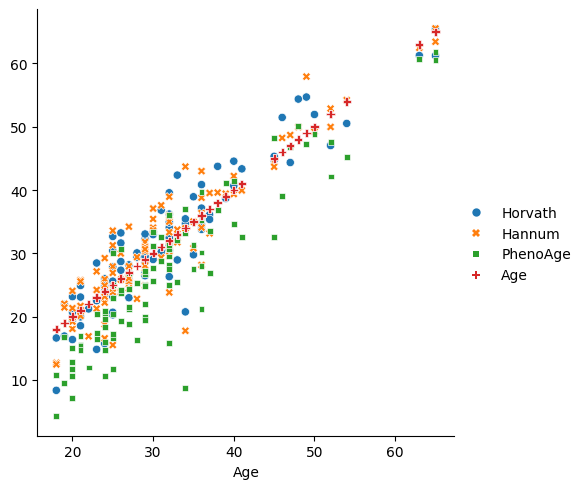

In [4]:
actual_age = data.metadata['age']
plot_data = pd.DataFrame({
    'Horvath': horvath_results,
    'Hannum': hannum_results,
    'PhenoAge': phenoage_results,
    "Age": actual_age
})
plot_data.index=plot_data['Age']

sn.relplot(data=plot_data, kind="scatter");